In [1]:
from scipy import stats
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.tri as tri
from IPython.display import Image

## Generating synthetic data

In [2]:
F = 2 # number of features
K = 3 # number of classes of output
Nclass1 = 500 # number of points per class
Nclass2 = 300 # number of points per class
Nclass3 = 100 # number of points per class
#generating input
X_a = np.random.randn(Nclass1,F)+np.array([0,-2])
#X_a = np.random.normal(scale=2.0, size=(Nclass1,F))+np.array([0,-2])
X_b = np.random.randn(Nclass2,F)+np.array([2,2])
X_c = np.random.randn(Nclass3,F)+np.array([-2,2])
X = np.vstack([X_a,X_b,X_c])
# generating some 3-class output                                                                                                                                                                        
t = np.array([0]*Nclass1 + [1]*Nclass2+ [2]*Nclass3)

## <font color='red'>homework: try generating data as above, from different Gaussian distributions, and perform the classification to see how the decision boundaries become non-linear</font> 

<font color='red'>for example change the variance of the Gaussians, by sampling from a generic normal distribution as: </font>

X_a = np.random.normal(scale=2.0, size=(Nclass1,F))+np.array([0,-2])

<font color='red'>where the parameter 'scale' is what gives the variance. See corresponding numpy documentation</font>

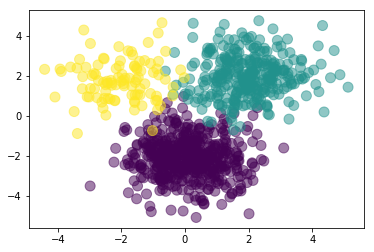

In [3]:
plt.scatter(X[:,0],X[:,1],c=t,s=100,alpha=0.5)
plt.show()

## get the means $\vec\mu_k$ of each class

In [4]:
def get_means(X,t,K):
    # K: number of classes
    Mu = []
    for k in range(K):
        Mu.append( np.mean(X[np.where(t==k)],axis=0) )
    return Mu

In [5]:
Mu=get_means(X,t,3)
print(Mu)

[array([ 0.09579762, -2.10001994]), array([1.98757141, 1.99111834]), array([-2.0028363 ,  1.79532723])]


## get the standard deviations $\vec\sigma_k$ of each class

In [6]:
def get_stds(X,t,K):
    # K: number of classes
    Sigma = []
    for k in range(K):
        Sigma.append( np.std(X[np.where(t==k)],axis=0,ddof=1) )
    return Sigma

In [7]:
Sigma=get_stds(X,t,3)
print(Sigma)

[array([0.94742656, 0.98743076]), array([0.99818006, 1.02855587]), array([0.93282887, 1.00221841])]


## get the priors (fractions) of each class

In [8]:
def get_priors(t):
    classes = np.unique(t)
    priors = []
    for c in classes:
        priors.append(len(t[np.where(t==c)]))
    return np.array(priors)/len(t)

In [9]:
priors=get_priors(t)
print(priors)

[0.55555556 0.33333333 0.11111111]


### this is the log of a Gaussian (likelihood), and the log of the joint (unnormalized posterior)

In [10]:
def logG(x,mu,sig):
    '''
    scope: this is the log of a Normal
    '''
    return -(x-mu)**2/2./sig**2 + np.log(1/np.sqrt(2*np.pi)/sig**2)

def logPost(Xnew,means,stds,prior):
    '''
    scope: this is the ln of the posterior of class k, without normalisation
           it assumes all variables are normally distributed
    '''
    D = len(Xnew)
    logLike=0.
    for d in range(D):
        logLike += logG(Xnew[d],means[d],stds[d])
    return logLike + np.log(prior)

### this is the prediction for the class of a new point $\vec x_{\rm new}$

In [11]:
def class_pred(xnew,Mu,Sigma,priors):
    '''
    scope: this is the class prediction for a new point Xnew
            p(C_k | xnew)
    input:
         Mu: KxD matrix of means for K classes and D features
         Sigma: KxD matrix of stds for K classes and D features
         priors: vector of priors with K components
    '''
    K = len(Mu)
    lnP=[]
    for i in range(K):
        lnP.append(logPost(xnew,Mu[i],Sigma[i],priors[i]))
    return np.argmax(lnP)

def pred_arr(Xnew,Mu,Sigma,priors):
    res=[]
    for xnew in Xnew:
        res.append(class_pred(xnew,Mu,Sigma,priors))
    return res

## results

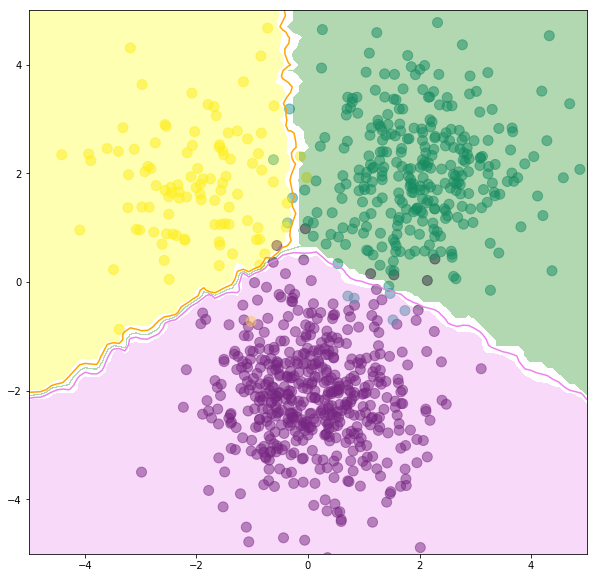

In [12]:
x1 = np.linspace(-5,5, 100)
x2 = np.linspace(-5,5, 100)
X1, X2 = np.meshgrid(x1, x2)

Xnew=-6 + 12*np.random.rand(5000,2)
Xall=np.vstack([X,Xnew])
Z=pred_arr(Xall,Mu,Sigma,priors)
triang = tri.Triangulation(Xall[:,0],Xall[:,1])
interpolator = tri.LinearTriInterpolator(triang, Z)
Zi = interpolator(X1, X2)

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X[:,0],X[:,1],c=t,s=100,alpha=0.5)
plt.contour(x1,x2, Zi,levels=[0.5,1.5],colors=("violet","orange"))
plt.contourf(x1,x2, Zi,levels=[0.99,1.01],alpha=0.3,colors='green')
plt.contourf(x1,x2, Zi,levels=[0.,0.1],alpha=0.3,colors='violet')
plt.contourf(x1,x2, Zi,levels=[1.9,2.1],alpha=0.3,colors='yellow')
plt.xlim(-5.,5.)
plt.ylim(-5,5)
plt.show()

In [13]:
def accuracy(y_pred,y):
    count=0
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            count += 1
    return count/len(y)

In [14]:
y_pred=pred_arr(X,Mu,Sigma,priors)
print('classification rate =', accuracy(y_pred,t))


classification rate = 0.9811111111111112
